In [ ]:
# Overlay the F1s of vae-inpt on decoded for the train-on-one, decode-on-another n = 600 file set

# 2022-11-17 read from the train-on-one_F1/devel dir
# Okay, so the e_RF_DT notebook has all the experiments in one
# This d_ code file set has all the experiments in a separate notebook
# summarize this, read inline ipad sketch / white board photo
    # Make a draw.io ?

# 2022-11-15 Tuesday, MAD across cohorts, norm within cohorts, overlay plot
# Plot series version 17 - same as self ( exprmt 1) This is train-on-one ( exprmt 2 )
# from d_self_ " " "

# originally
# from d_org-dcd.ipynb - 25 cohorts on x axis 
# and train_on_one.ipynb - 24 cohorts on x axis ( this train-on-one-decode version should have 24, so primarily use this )

# Want a seperate notebook for SELF, TRAIN-ON-ONE, etc.. - done, through exprmt 2 with this notebook ( end, no _c yet )

In [ ]:
ls train-on-one_F1s/devel

In [ ]:
%whos

In [ ]:
import pandas as pd
import glob as glob

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from statistics import mean
from statistics import stdev

In [ ]:
vae_inp = pd.read_csv('input-to-VAE_F1s/RF_input-to-vae_F1s.tsv', sep = '\t', index_col = 0)
vae_inp.sort_index(inplace = True)
vae_inp
cohort_list = list(vae_inp.index.str.split('_').str[0])

In [ ]:
# train-on-one F1s from normalize-within-cohort, common mad 5k

In [118]:
600*25

15000

In [119]:
len(vae_inp.index) # Clutch

25

In [ ]:
file_check = pd.read_csv('train-on-one_F1s/PCPG_RF_predict_on_n=24.tsv',
                         sep = '\t', index_col = 0)

In [ ]:
file_check

In [ ]:
file_check[file_check.index.str.contains(cohort+'_trained_')]

In [120]:
manual_toggle = ['UVM']

UVM
vae-inp done


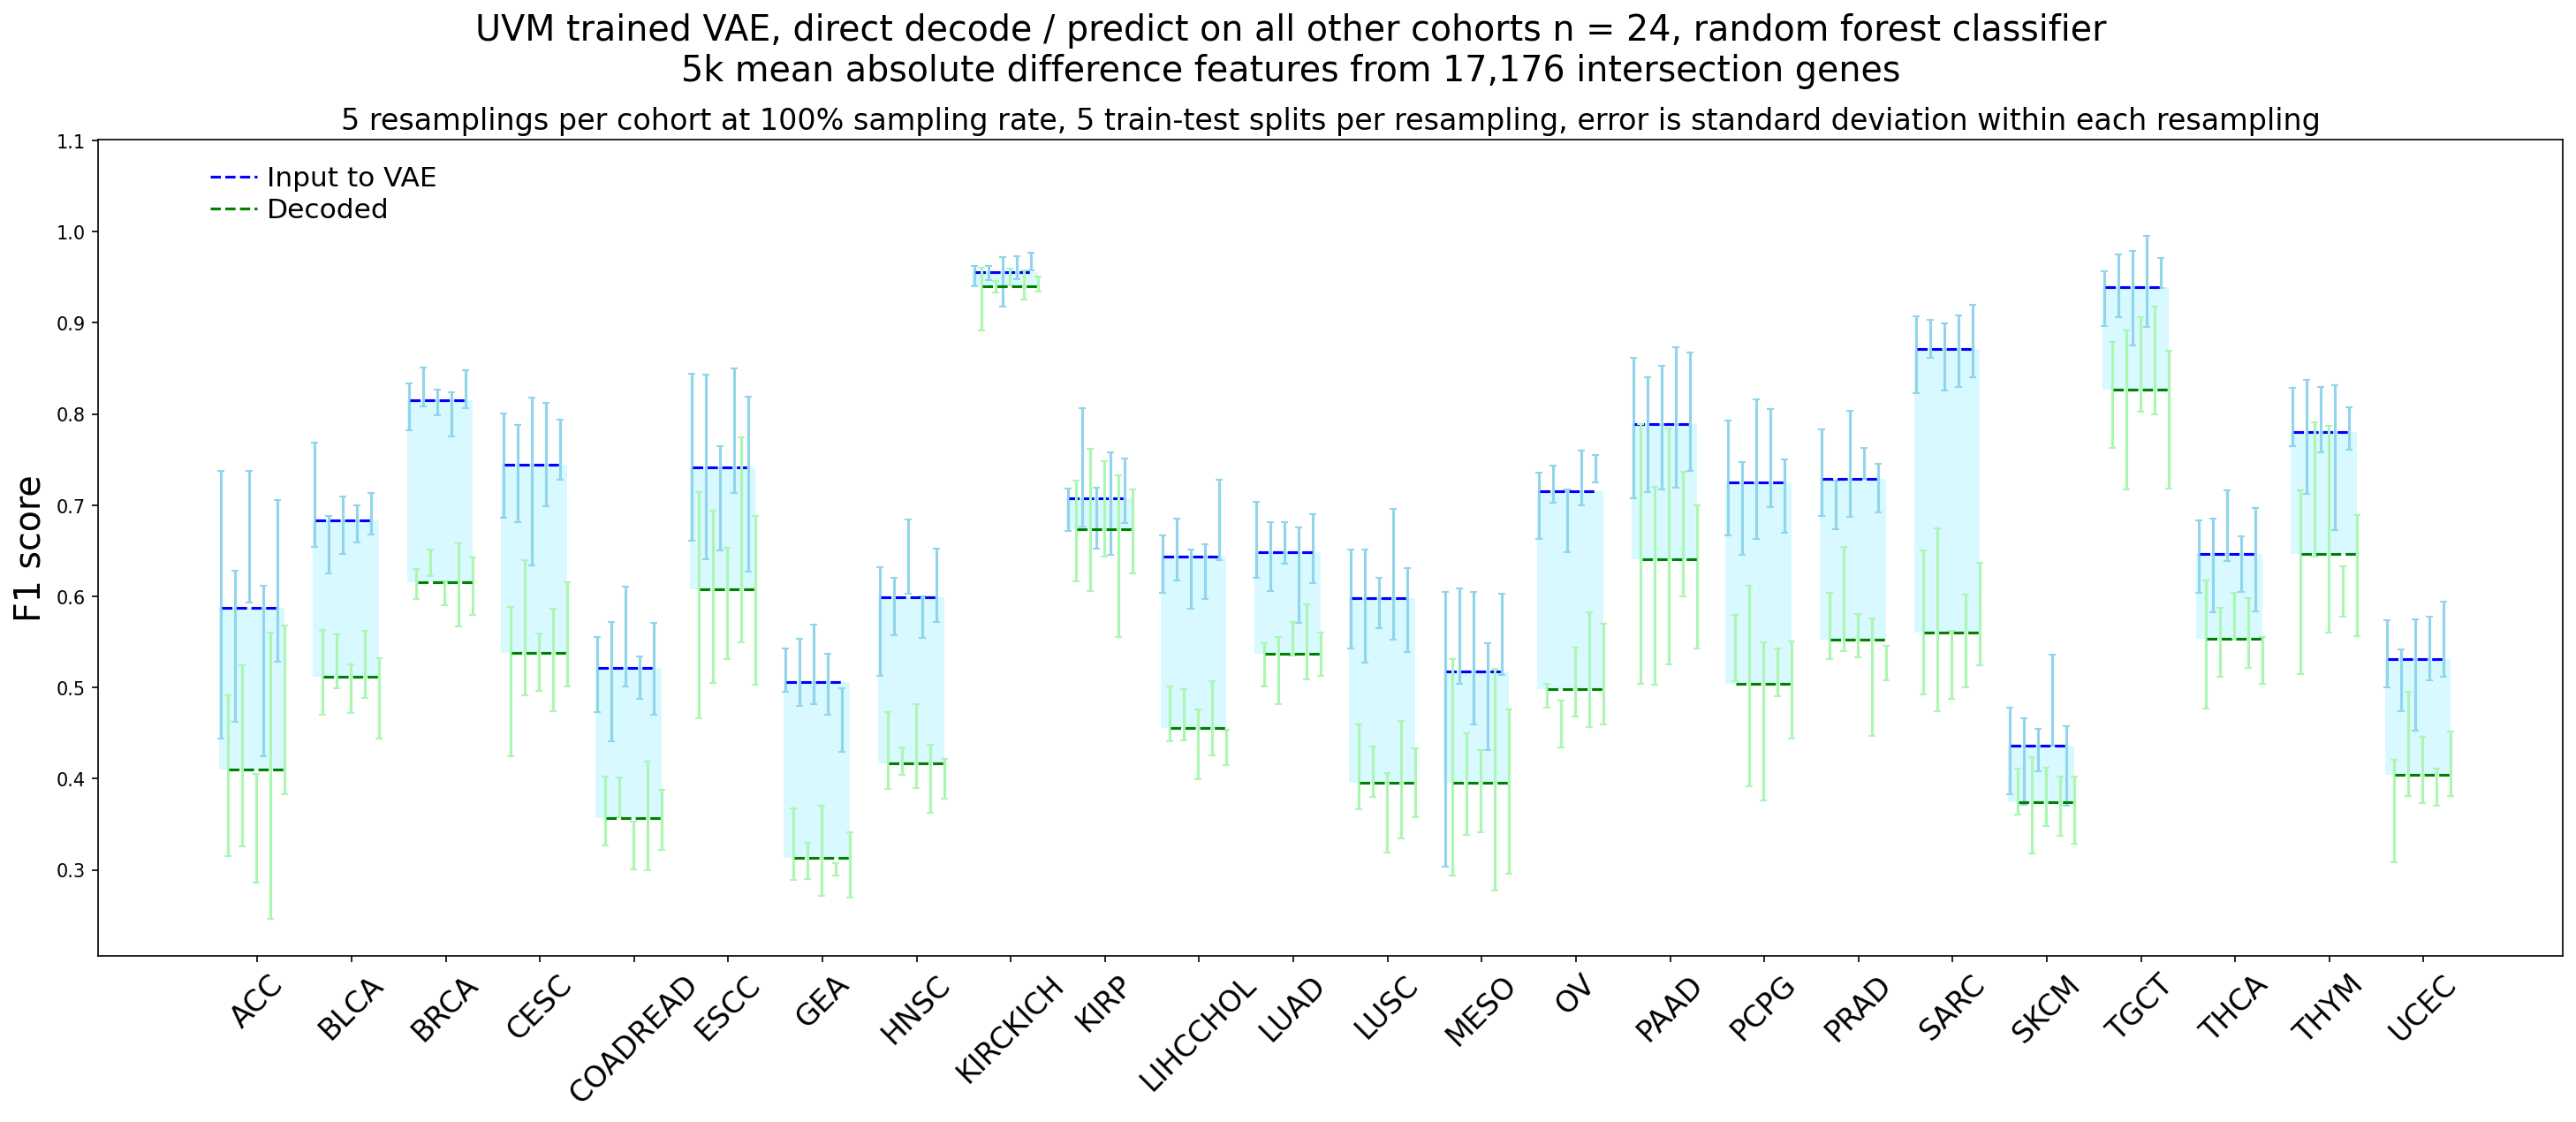

In [122]:
# VAE input and decoded overlay plot, v17, train-on-one notebook,
# from d_self and d_train_on_one.ipynb
plt_v = 17

# clf_name = 'random_forest'
# clf_code = 'RF'

clf_name = 'decision_tree'
clf_code = 'DT'

re_samp = 5
trn_tst_splts = 5

# figure(figsize=(len(RF_ACC_dec.index), 8), dpi=150)

# for cohort in vae_inp.index.str.split('_').str[0]: # Training cohort loop
for cohort in manual_toggle:
# for cohort in cohort_list:
    print(cohort)
    
    dec_n = pd.read_csv('train-on-one_F1s/'+
                        cohort+'_'+clf_code+'_predict_on_n=24.tsv',
                    sep = '\t', index_col = 0)
    dec_n = dec_n[dec_n.index.str.contains(cohort+'_trained_')] # dataframe reset point in e_
    figure(figsize=(len(dec_n.index), 8), dpi=150)

    x_tck_lst = []
    cohort_list = []
    
    vae_inp = pd.read_csv(
        'input-to-VAE_F1s/'+clf_code+'_input-to-vae_F1s.tsv',
        sep = '\t', index_col = 0)
    vae_inp.sort_index(inplace = True)
    vae_inp = vae_inp[ vae_inp.index.str.contains( cohort )==False ]
    # break

    # VAE input section, inp
    vae_inp_ave_means = []
    for idx_pos, idx in enumerate(vae_inp.index): # Skip ACC in VAE inpt obj
                            # This is a hack, should drop by unique cohort list 
                            # from training loop

        x = idx_pos-.04
        vae_inp_ave_mean = []
        for rs in list(range(0, re_samp)): # Step through F1 columns

            adder = .15
            x = x+adder
            plt.errorbar(
                x,
                vae_inp.loc[idx, 'mean'+str(rs)],
                yerr=vae_inp.loc[idx, 'std'+str(rs)], capsize = 2,
                color = '#90D5EC')
            vae_inp_ave_mean.append(vae_inp.loc[idx, 'mean'+str(rs)])
        vae_inp_ave_means.append(mean(vae_inp_ave_mean))
        x_points = [x-.5-.09, x]
        y_points = [mean(vae_inp_ave_mean), mean(vae_inp_ave_mean)]
        plt.plot(x_points, y_points, linestyle='dashed', color = 'blue') # blue is raw
        x_tck_lst.append(idx_pos+.5) # X labels based on dropped training cancer, 
        # Safer to drive off of the decoded prediction object
        # Sould line up any way though
        cohort_list.append(idx.split('_')[0]) # only need once, send to end
    print('vae-inp done')


    for idx_pos, idx in enumerate(dec_n.index): # decoded is green

        x = idx_pos+.04
        dec_n_ave_mean = []
        for rs in list(range(0, re_samp)): # use to step through the columns

            adder = .15
            x = x+adder
            plt.errorbar(
                x,
                dec_n.loc[idx, 'mean'+str(rs)],
                yerr=dec_n.loc[idx, 'std'+str(rs)], capsize = 2,
                color = '#abf7b1')
            dec_n_ave_mean.append(dec_n.loc[idx, 'mean'+str(rs)])

        x_points = [x-.5-.09, x]
        y_points = [mean(dec_n_ave_mean), mean(dec_n_ave_mean)]
        plt.plot(x_points, y_points, linestyle='dashed', color = 'green') # decoded

        if vae_inp_ave_means[idx_pos] > mean(dec_n_ave_mean):
            plt.bar(x, height = vae_inp_ave_means[idx_pos]-mean(dec_n_ave_mean),
                    width = -.7,
                    bottom = mean(dec_n_ave_mean),
                    align = 'edge', color = '#d8f9ff')


        if vae_inp_ave_means[idx_pos] < mean(dec_n_ave_mean):
            plt.bar(x, height = vae_inp_ave_means[idx_pos]-mean(dec_n_ave_mean),
                    width = -.7,
                    bottom = mean(dec_n_ave_mean),
                    align = 'edge', color = '#e8f3db')
        # break
    plt.xticks(x_tck_lst, labels = cohort_list, rotation = 45, fontsize = 16) 
    plt.suptitle(
    cohort +
    ' trained VAE, direct decode / predict on all other cohorts n = 24, '+
        'random forest'+' classifier\n'+
    '5k mean absolute difference features from 17,176 intersection genes',
        fontsize = 19, y= 1.0)
    plt.title('5 resamplings per cohort at 100% sampling rate, 5'+
              ' train-test splits per resampling, error is standard deviation within each resampling',
             fontsize = 16)
    plt.ylabel('F1 score', fontsize = 19)
    legend_x, legend_y = -.0, 1.06
    y_off = .035

    plt.plot((legend_x, legend_x+.5), (legend_y, legend_y),
             linestyle='dashed', color = 'blue') # original
    plt.plot((legend_x, legend_x+.5), (legend_y-y_off, legend_y-y_off),
             linestyle='dashed', color = 'green') # decoded

    center = .010
    plt.annotate('Input to VAE', (legend_x+.6,legend_y-center), fontsize = 15)          # blue
    plt.annotate('Decoded', (legend_x+.6, legend_y-y_off-center), fontsize = 15) # green

    plt.savefig('train-on-one_overlays/train-on-one_overlay_'+cohort+'_'+
                clf_name+'_v'+
                str(plt_v)+'.png', dpi = 150,
                   bbox_inches = 'tight')
    # break

In [ ]:
# End, the dataframe reset point was fixed in the e_RF_DT_org-dec.ipynb
# subset point noted above

#### Design ideas

Make a triple-overlay plot - vae-ipt, RF, DT  
Wrong, quad overlay because vae-inpt has both an RF and DT version

In [ ]:
 # could just leave training cohort in plot (?),
    # no, would require reading 'self' data set and resetting the x-axis

In [ ]:
vae_inp[ vae_inp.index.str.contains( cohort )==False ]

In [ ]:
cohort

In [ ]:
vae_inp

In [ ]:
#### Devel / inspections:

# hold